E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "E:\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "E:\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start


[ 0.  1.  2.  3.  4.  5.  6.  7.]


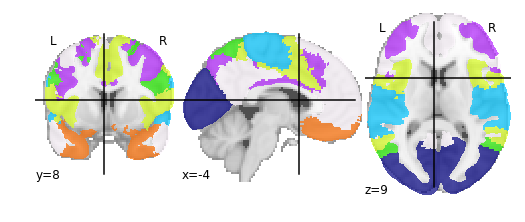

In [5]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
# %matplotlib inline
plt.style.use('ggplot')

from bids.grabbids import BIDSLayout

import nibabel as nib
import numpy as np

from nilearn.datasets import fetch_atlas_craddock_2012, fetch_atlas_basc_multiscale_2015, fetch_nyu_rest, fetch_atlas_yeo_2011
from nibabel.processing import resample_from_to
from nilearn.input_data import NiftiMapsMasker

data_dir = 'E:/brains/'

project_root = data_dir + '/ds000114_R2.0.1/'
work_dir = data_dir + '/noisy_connectomes/'

layout = BIDSLayout(project_root)
# layout.get_subjects()
# 
# print(layout.get_subjects())
# nyu = fetch_nyu_rest(resume=True)
# parcellations = fetch_atlas_basc_multiscale_2015(version='sym')
# print(dir(parcellations))
# print(parcellations.description)
# atlas = parcellations['scale064']

parcels = fetch_atlas_yeo_2011()
atlas = parcels['thick_7']

from nilearn.plotting import plot_img, plot_roi

atlas_img = nib.load(atlas)
atlas_volume = atlas_img.get_data()

region_numbers = np.unique(atlas_volume)
print(region_numbers)

plot_roi(atlas)

from sklearn.covariance import GraphLassoCV

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


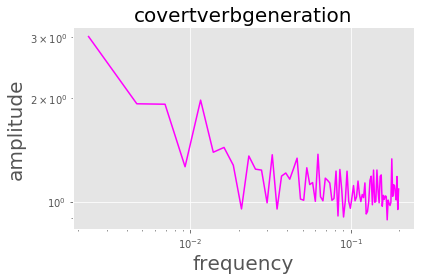

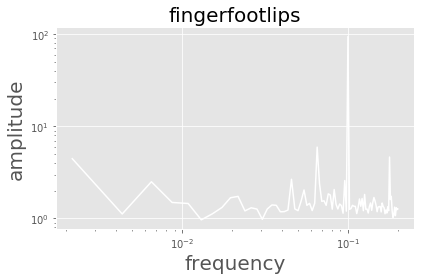

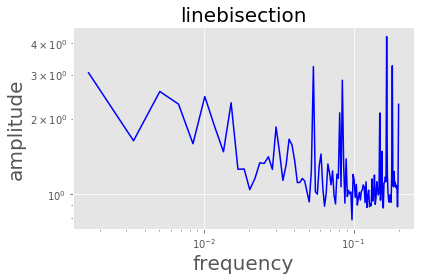

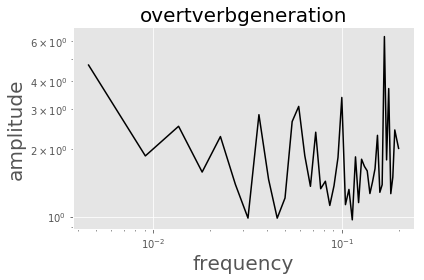

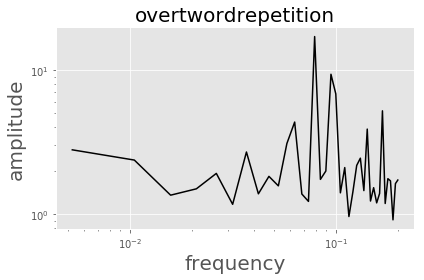

In [7]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting

from scipy.signal import periodogram
import colorednoise as cn

colours = ['pink', 'white', 'blue']
colours_alpha = [-1, 0, 1]

masker = NiftiLabelsMasker(labels_img=atlas_img, standardize=True)
correlation_measure = ConnectivityMeasure(kind='correlation')

for task in layout.get_tasks():
    plt.figure(figsize=(6,4))
    plt.xlabel('frequency', fontsize=20)
    plt.ylabel('amplitude', fontsize=20)
    plt.title(task, fontsize=20)
    
    for subj in layout.get_subjects():
        trial_1 = layout.get(subject=subj, session='test', task=task, extensions='.nii.gz')
        trial_2 = layout.get(subject=subj, session='retest', task=task, extensions='.nii.gz')
        
        # fmri = nib.load(trial_1[0].filename)
        # fmri_img = fmri.get_data()
        # print(fmri_img.shape)
        
        # colour_fmri_filenames = []
        # for colour_name, colour_alpha in zip(colours, colours_alpha):
        #     
        #     colourful_mri = np.copy(fmri_img)
        #     for x in range(fmri_img.shape[0]):
        #         for y in range(fmri_img.shape[1]):
        #             for z in range(fmri_img.shape[2]):
        #                 fmri_img[x, y, z, :] += cn.powerlaw_psd_gaussian(colour_alpha, fmri_img.shape[-1])
        #     
        #     new_fmri = nib.Nifti2Image(colourful_mri, fmri_img.affine)
        #     new_fmri_filename = work_dir + subj + '_' + colour_name + '.nii.gz'
        #     
        #     colour_fmri_filenames.append(new_fmri_filename)
        #     nib.save(colourful_mri, new_fmri_filename)
        
        time_series_1 = masker.fit_transform(trial_1[0].filename)
        time_series_2 = masker.fit_transform(trial_2[0].filename)
        
        # print(time_series_1.shape, time_series_2.shape)
        
        if '01' in subj:
            avg_power = np.zeros((time_series_1.shape[0] // 2 + 1))
        n_regions = time_series_1.shape[-1]
        
        for region_num in range(n_regions):
            freq_1, pxx_1 = periodogram(time_series_1[:, region_num], fs=1/2.5)
            freq_2, pxx_2 = periodogram(time_series_2[:, region_num], fs=1/2.5)
            
            power_diff = np.divide(pxx_1, pxx_2)
            avg_power += (power_diff / n_regions)
    
    colour = 'k'
    if 'covert' in task:
        colour = 'magenta'
    if 'fingerfootlips' in task:
        colour = 'white'
    if 'linebisection' in task:
        colour = 'blue'
        
    plt.loglog(freq_1, avg_power/len(layout.get_subjects()), color=colour)
    
    plt.tight_layout()
    # plt.ylim([0.1, 10])
    # plt.xlim([0.01, 2.5])
    plt.savefig('E:/brains/temp/' + task + '.png', dpi=500)
        
        # print(time_series_1.shape)
        # 
        # correlation_matrix_1 = correlation_measure.fit_transform([time_series_1])[0]
        # correlation_matrix_2 = correlation_measure.fit_transform([time_series_2])[0]
        # 
        # np.fill_diagonal(correlation_matrix_1, 0)
        # np.fill_diagonal(correlation_matrix_2, 0)
        # 
        # print('Subject:', subj)
        # plotting.plot_matrix(correlation_matrix_1, figure=(10, 8), vmax=0.8, vmin=-0.8)
        # plotting.plot_matrix(correlation_matrix_2, figure=(10, 8), vmax=0.8, vmin=-0.8)